It can be tempting to use importance resampling to select a subsample from MCMC output using the posterior probabilities as weights. This, however, produces incorrect results, since the resulting samples no longer come from the target distribution and will yield different expectations, as we show below.

# Importance sampling and resampling

In the classical importance sampling setup, we are looking to estimate the expectation $\mathbb{E}_{x \sim p(x)}[h(x)]$ with respect to some distribution $p(x)$ which is hard to sample from. If another distribution $q(x)$ with $\text{supp}(p) \subset \text{supp}(q)$ can be found and is easy to sample from, the expectation can be derived as follows:
$$\mathbb{E}_{x \sim p(x)}[h(x)] = \int h(x) p(x) dx = \int h(x) \frac{p(x)}{q(x)} q(x) dx = \mathbb{E}_{x \sim q(x)}\left[h(x) \frac{p(x)}{q(x)}\right] = \mathbb{E}_{x \sim q(x)}[h(x) w(x)],$$
where $w(x) = \frac{p(x)}{q(x)}$ is the importance weight. We can then approximate 
$$\mathbb{E}_{x \sim p(x)}[h(x)] = \mathbb{E}_{x \sim q(x)}[h(x) w(x)] \approx \frac{1}{n} \sum_{i=1}^n h(x_i) w(x_i), \qquad x_i \sim q(x).$$
It is clear that
$$\mathbb{E}_{x_i \sim q(x)}\left[ \frac{1}{n} \sum_{i=1}^n h(x_i) w(x_i) \right] = \mathbb{E}_{x \sim q(x)}[h(x) w(x)],$$
so the approximation is unbiased.

With self-normalised importance resampling, we have
$$\tilde{w}_i = \frac{w(x_i)}{\sum_{j=1}^n w(x_j)},$$
so the approximation becomes 
$$\mathbb{E}_{x \sim p(x)}[h(x)] = \mathbb{E}_{x \sim q(x)}[h(x) w(x)] \approx \sum_{i=1}^n h(x_i) \tilde{w}_i.$$
It can be shown than
$$\mathbb{E}_{x \sim q(x)}\left[\sum_{i=1}^n h(x_i) \tilde{w}_i \right] = \mathbb{E}_{x \sim q(x)}[h(x) w(x)] + O\left(\frac{1}{n}\right),$$
so the approximation is asymptotically unbiased.

Importance resampling transforms a sample with weights 
$$(x_{1:n}, \tilde{w}_{1:n})$$
into an equally weighted sample
$$\left(\tilde{x}_{1:n}, \frac{1}{n}\right),$$
where each $\tilde{x}_i$ is independently sampled from the discrete distribution over $x_{1:n}$ with probabilities $\tilde{w}_{1:n}$, so that
$$\mathbb{E}[n_i | x_{1:n}, \tilde{w}_{1:n}] = n \tilde{w}_i,$$
where $n_i$ is the number of times sample $x_i$ is selected in the result for inclusion in $\left(\tilde{x}_{1:n}, \frac{1}{n}\right)$. This transformation allows us to approximate:
$$\sum_{i=1}^n h(x_i) \tilde{w}_i \approx \frac{1}{n} \sum_{i=1}^n h(\tilde{x}_i)$$

Taking the expectation, we have
$$\begin{split}
\mathbb{E}\left[ \frac{1}{n} \sum_{i=1}^n h(\tilde{x}_i) \right]
&= \mathbb{E}\left[ \frac{1}{n} \sum_{j=1}^n n_j h(x_j) \right] \\
&= \frac{1}{n} \sum_{j=1}^n  \mathbb{E}\left[ n_j h(x_j) \right] \\
&= \frac{1}{n} \sum_{j=1}^n  \mathbb{E}\left[ \mathbb{E}[ n_j h(x_j) | x_{1:n}, \tilde{w}_{1:n}] \right] \\
&= \frac{1}{n} \sum_{j=1}^n  \mathbb{E}\left[ h(x_j) \mathbb{E}[ n_j | x_{1:n}, \tilde{w}_{1:n}] \right] \\
&= \frac{1}{n} \sum_{j=1}^n  \mathbb{E}\left[ h(x_j) n \tilde{w}_j \right] \\
&= \mathbb{E}\left[ \sum_{j=1}^n   h(x_j) \tilde{w}_j \right],
\end{split}$$
which shows that the preceding approximation is unbiased. In the derivation, we used the tower property of the conditional expectation and the equality $\mathbb{E}[n_i | x_{1:n}, \tilde{w}_{1:n}] = n \tilde{w}_i$.

In summary, the method provides the following chain of approximations:
$$\mathbb{E}_{x \sim p(x)}[h(x)] = \mathbb{E}_{x \sim q(x)}[h(x) w(x)] \approx \sum_{i=1}^n h(x_i) \tilde{w}_i \approx \frac{1}{n} \sum_{i=1}^n h(\tilde{x}_i),$$
where the first equality holds if $w(x) = \frac{p(x)}{q(x)}$, the second approximate equality holds in expectation if $n \to \infty$ and the third approximate equality holds in expectation by construction of the importance resampling method.

# Erroneous application of importance resampling

In the classic importance resampling described above, we proceed as follows:

   1. obtain a sample $x_i \sim q(x)$,
   2. calculate the weights $w(x_i) = \frac{p(x_i)}{q(x_i)}$,
   3. obtain a new sample $\tilde{x}_i$ from the dicrete distribution over $x_i$ with probabilities $\frac{w(x_i)}{\sum_{j=1}^n w(x_j)}$.

The chain of approximations in the previous sections then yields
$$\mathbb{E}_{x \sim p(x)}[h(x)] \approx \frac{1}{n} \sum_{i=1}^n h(\tilde{x}_i).$$

If, however, we start with a sample $x \sim p(x)$ in step 1, the weights required for the approximation to hold are $w(x_i) = \frac{p(x)}{p(x)} = 1$. Attempting to use different weights means that the first equality in the chain no longer holds in general:
$$\mathbb{E}_{x \sim p(x)}[h(x)] \neq \mathbb{E}_{x \sim q(x)}[h(x) w(x)] \approx \sum_{i=1}^n h(x_i) \tilde{w}_i \approx \frac{1}{n} \sum_{i=1}^n h(\tilde{x}_i)$$

# Example

Here we demonstrate the consequences of applying the pseudo-importance resampling procedure repeatedly to a sample from a bivariate normal distribution.

In [1]:
from itertools import islice

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [2]:
rng = np.random.default_rng(12345)

First, we obtain a sample from a bivariate normal with a given mean and covariance matrix:

In [3]:
mean = np.array([0., 0.])
cov = np.array([[1.0, 0.8], [0.8, 2.0]])

In [4]:
n_samples = 100

In [5]:
sample = mvn.rvs(mean=mean, cov=cov, size=n_samples, random_state=rng)

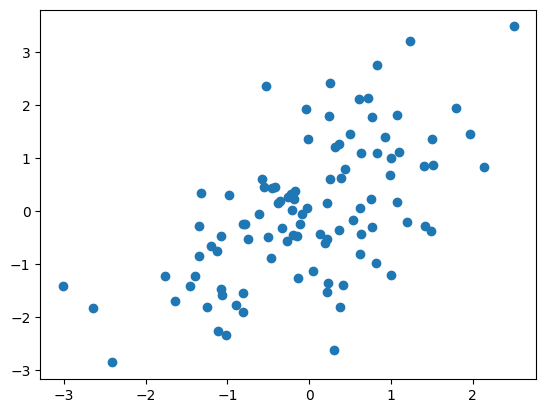

In [6]:
fig, ax = plt.subplots()
ax.scatter(sample[:, 0], sample[:, 1]);
xlim = ax.get_xlim()
ylim = ax.get_ylim()

We define the procedure to apply importance resampling:

In [7]:
def importance_resampling(sample, weights, size):
    weights = weights / np.sum(weights)
    idx = rng.choice(sample.shape[0], size, p=weights)
    return sample[idx]

as well as random resampling (essentially, bootstrap-type resampling):

In [8]:
def random_resampling(sample, size):
    idx = rng.choice(sample.shape[0], size)
    return sample[idx]

In [9]:
def iterate_apply(init, func):
    while True:
        yield init
        init = func(init)

Both resampling approaches are applies repeatedly for a given number of iterations:

In [10]:
n_iterations = 15

In [11]:
def importance_resample(sample):
    # use the probabilities as weights for importance resampling
    # in order to demonstrate the consequences
    p = mvn.pdf(sample, mean=mean, cov=cov)
    return importance_resampling(sample, p, n_samples)

In [12]:
importance_resamples = list(islice(iterate_apply(sample, importance_resample), n_iterations))
random_resamples = list(islice(iterate_apply(sample, lambda s: random_resampling(s, n_samples)), n_iterations))

We demonstrate the results in a series of plots:

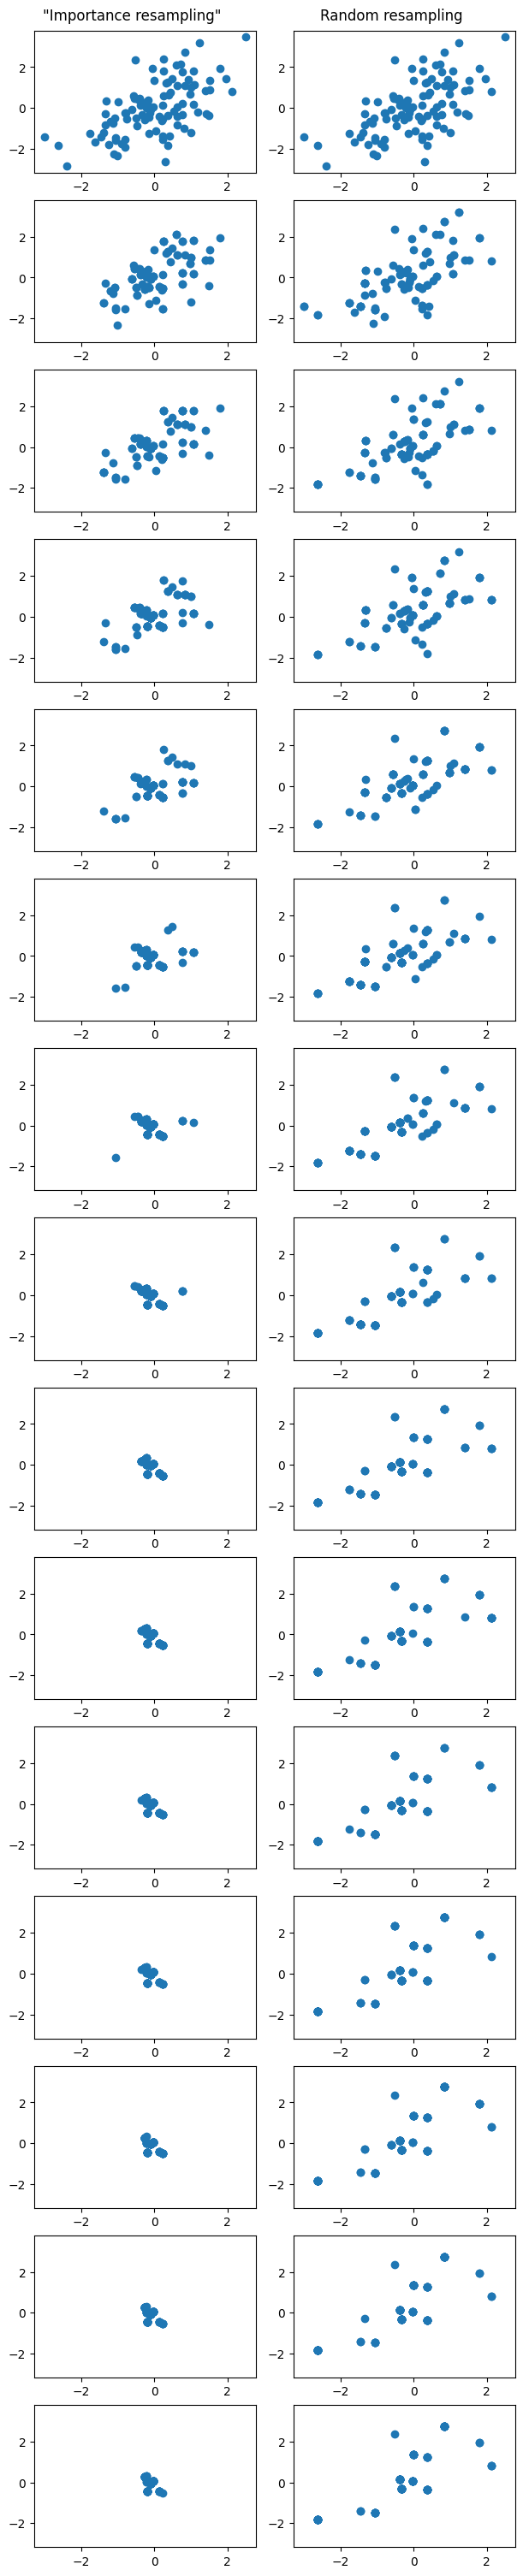

In [13]:
sample1 = sample.copy()
sample2 = sample.copy()

fig = plt.figure(constrained_layout=True, figsize=(6, 2 * n_iterations))
subfigs = fig.subfigures(nrows=1, ncols=2)
axs1 = subfigs[0].subplots(nrows=n_iterations, ncols=1)
subfigs[0].suptitle('"Importance resampling"');
axs2 = subfigs[1].subplots(nrows=n_iterations, ncols=1)
subfigs[1].suptitle('Random resampling');
for i in range(n_iterations):
    axs1[i].scatter(importance_resamples[i][:, 0], importance_resamples[i][:, 1]);
    axs1[i].set_xlim(xlim);
    axs1[i].set_ylim(ylim);

    axs2[i].scatter(random_resamples[i][:, 0], random_resamples[i][:, 1]);
    axs2[i].set_xlim(xlim);
    axs2[i].set_ylim(ylim);

It is clear that the dispersion of the sample shrinks as "importance resampling" is applied repeatedly.

In [14]:
covs = list(map(lambda x: np.cov(x, rowvar=False, ddof=1), importance_resamples))

Here is the sample covariance matrix of the original sample:

In [15]:
covs[0]

array([[1.03414101, 0.78454989],
       [0.78454989, 1.69562024]])

and the sample obtained after repeatedly applying "importance resampling":

In [16]:
covs[-1]

array([[ 0.01492306, -0.01382788],
       [-0.01382788,  0.08158041]])

Random resampling by contrast preserves the dispersion of values:

In [17]:
list(map(lambda x: np.cov(x, rowvar=False, ddof=1), random_resamples))[-1]

array([[1.25096402, 1.1749175 ],
       [1.1749175 , 1.77138095]])